In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

1. Загрузка данных...

2. Первичный анализ данных:
Размер数据集: (32561, 15)

Первые 5 строк:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174      

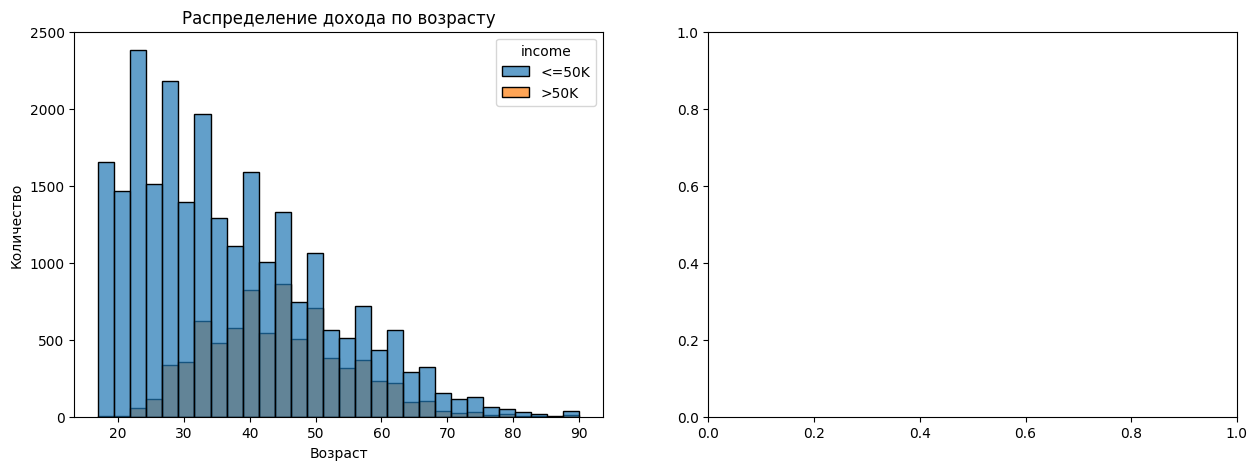

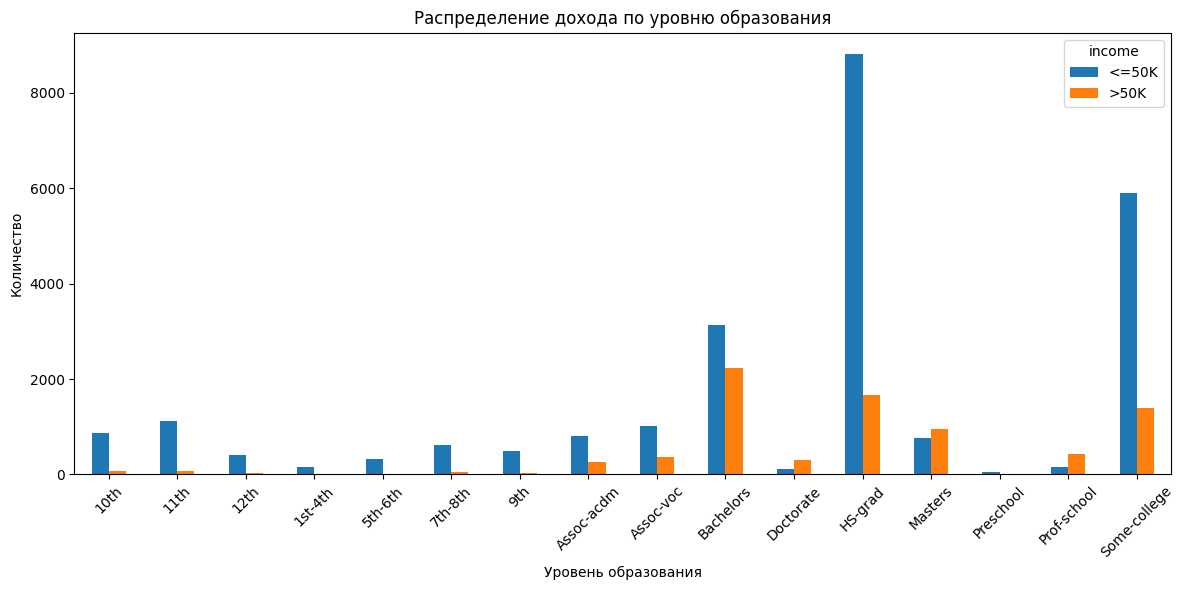


5. Преобразование категориальных признаков...
Размер данных после преобразований: (32561, 101)

6. Разделение данных...
Обучающая выборка: (26048, 100)
Тестовая выборка: (6513, 100)

7. Обучение моделей...
Модели обучены успешно!

8. Оценка моделей на тестовой выборке:
Точность логистической регрессии: 0.8551
Точность SVM: 0.8528

АНАЛИЗ РЕЗУЛЬТАТОВ

9. ВЫВОДЫ:
Обе модели показали хорошую точность предсказания уровня дохода.

10. ПРЕОБРАЗОВАНИЯ ДАННЫХ:
- Удалены строки с пропусками
- Категориальные признаки преобразованы с помощью One-Hot Encoding
- Данные масштабированы с помощью StandardScaler
- Выборка разделена на обучающую (80%) и тестовую (20%)

11. СРАВНЕНИЕ ТОЧНОСТИ:
Логистическая регрессия: 0.8551
SVM: 0.8528
Разница в точности: 0.0023

12. АНАЛИЗ ЭФФЕКТИВНОСТИ:
Модели справились с задачей хорошо, показав высокую точность.

РЕКОМЕНДАЦИИ ДЛЯ УЛУЧШЕНИЯ:
1. Более тщательный feature engineering
2. Подбор гиперпараметров моделей
3. Использование кросс-валидации
4. Применение други

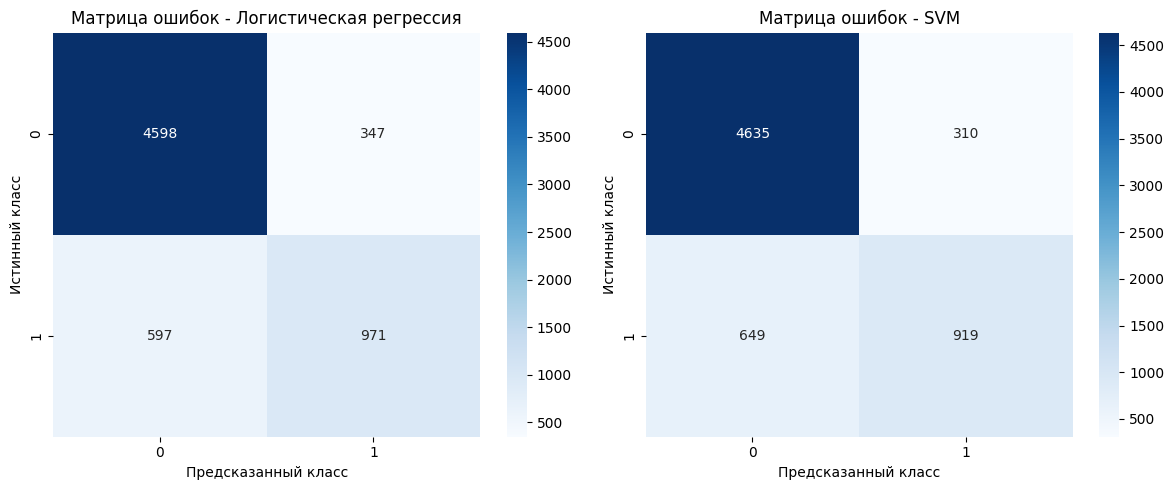


Лабораторная работа завершена!


In [2]:
warnings.filterwarnings('ignore')

# 1. Загрузка данных
print("1. Загрузка данных...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

# 2. Первичный анализ
print("\n2. Первичный анализ данных:")
print(f"Размер数据集: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистическое описание:")
print(df.describe())

# 3. Обработка пропущенных значений
print("\n3. Обработка пропущенных значений:")
print("Количество пропусков по столбцам:")
print(df.isnull().sum())

# Удаление строк с пропусками (основной способ)
df_cleaned = df.dropna()
print(f"Размер данных после удаления пропусков: {df_cleaned.shape}")

# 4. Визуализация данных
print("\n4. Визуализация данных...")
plt.figure(figsize=(15, 5))

# График 1: Распределение дохода по возрасту
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='age', hue='income', bins=30, alpha=0.7)
plt.title('Распределение дохода по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# График 2: Распределение дохода по образованию
plt.subplot(1, 2, 2)
education_income = pd.crosstab(df_cleaned['education'], df_cleaned['income'])
education_income.plot(kind='bar', figsize=(12, 6))
plt.title('Распределение дохода по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Преобразование категориальных признаков
print("\n5. Преобразование категориальных признаков...")

# Копируем данные для преобразований
df_processed = df_cleaned.copy()

# Целевая переменная
le_income = LabelEncoder()
df_processed['income_encoded'] = le_income.fit_transform(df_processed['income'])

# Категориальные признаки для кодирования
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                      'relationship', 'race', 'sex', 'native-country']

# One-Hot Encoding
df_encoded = pd.get_dummies(df_processed, columns=categorical_columns, drop_first=True)

# Удаляем исходные текстовые столбцы
columns_to_drop = ['income']
df_encoded = df_encoded.drop(columns=columns_to_drop)

print(f"Размер данных после преобразований: {df_encoded.shape}")

# 6. Разделение на обучающую и тестовую выборки
print("\n6. Разделение данных...")
X = df_encoded.drop('income_encoded', axis=1)
y = df_encoded['income_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Обучение моделей
print("\n7. Обучение моделей...")

# Логистическая регрессия
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Метод опорных векторов (SVM)
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

print("Модели обучены успешно!")

# 8. Оценка моделей
print("\n8. Оценка моделей на тестовой выборке:")

# Логистическая регрессия
y_pred_logreg = log_reg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Точность логистической регрессии: {accuracy_logreg:.4f}")

# Метод опорных векторов
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Точность SVM: {accuracy_svm:.4f}")

# 9-12. Анализ результатов
print("\n" + "="*50)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*50)

print("\n9. ВЫВОДЫ:")
print("Обе модели показали хорошую точность предсказания уровня дохода.")

print("\n10. ПРЕОБРАЗОВАНИЯ ДАННЫХ:")
print("- Удалены строки с пропусками")
print("- Категориальные признаки преобразованы с помощью One-Hot Encoding")
print("- Данные масштабированы с помощью StandardScaler")
print("- Выборка разделена на обучающую (80%) и тестовую (20%)")

print("\n11. СРАВНЕНИЕ ТОЧНОСТИ:")
print(f"Логистическая регрессия: {accuracy_logreg:.4f}")
print(f"SVM: {accuracy_svm:.4f}")
difference = abs(accuracy_logreg - accuracy_svm)
print(f"Разница в точности: {difference:.4f}")

print("\n12. АНАЛИЗ ЭФФЕКТИВНОСТИ:")
if accuracy_logreg > 0.8 and accuracy_svm > 0.8:
    print("Модели справились с задачей хорошо, показав высокую точность.")
else:
    print("Модели показали удовлетворительный результат, но есть возможности для улучшения.")

print("\nРЕКОМЕНДАЦИИ ДЛЯ УЛУЧШЕНИЯ:")
print("1. Более тщательный feature engineering")
print("2. Подбор гиперпараметров моделей")
print("3. Использование кросс-валидации")
print("4. Применение других алгоритмов (случайный лес, градиентный бустинг)")
print("5. Балансировка классов при необходимости")

# Дополнительная визуализация результатов
plt.figure(figsize=(12, 5))

# Матрицы ошибок
plt.subplot(1, 2, 1)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок - Логистическая регрессия')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.subplot(1, 2, 2)
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок - SVM')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.tight_layout()
plt.show()

